In [32]:
import pandas as pd
import jsonlines
import os
import seaborn as sns
from pprint import pprint
from glob import glob
import re
import matplotlib.pyplot as plt
sns.set_theme()

In [15]:
files = glob("../outputs/*/*/chatgpt/leaderboard.csv")
dfs = []

for file in files:
    df = pd.read_csv(file, index_col=0)
    model_name = "/".join(file.split("/")[-4:-2])
    df["model"] = model_name
    beta = re.match(r".*beta(\d+(\.\d+)?).*", file)
    lr = re.search(r"lr(\d+e-\d+)", file)
    df["beta"] = float(beta.group(1)) if beta else "base"
    df["lr"] = float(lr.group(1)) if lr else "base"
    df["repo"] = model_name.split("@")[0]
    df["method"] = model_name.split("@")[0].split("3b-")[1] if "microsoft" not in model_name else "base"

    # display(df)
    dfs.append(df)
df = pd.concat(dfs)
df

,win_rate,standard_error,mode,avg_length,n_wins,n_wins_base,n_draws,n_total,discrete_win_rate,length_controlled_winrate,model,beta,lr,repo,method
microsoft/Phi-3-mini-4k-instruct,45.822785,1.773824,community,3886,362,428,0,790,45.822785,38.042158,microsoft/Phi-3-mini-4k-instruct,base,base,microsoft/Phi-3-mini-4k-instruct,base
heegyu/0601-phi-3b-dpo-feedback-tree@lr5e-6-beta0.1-epoch-1,48.106061,1.776519,community,3899,381,411,0,792,48.106061,41.594449,heegyu/0601-phi-3b-dpo-feedback-tree@lr5e-6-be...,0.1,0.000005,heegyu/0601-phi-3b-dpo-feedback-tree,dpo-feedback-tree
heegyu/0601-phi-3b-dpo-feedback-tree@lr1e-5-beta0.25-epoch-1,48.527529,1.789511,community,3903,379,402,0,781,48.527529,41.965525,heegyu/0601-phi-3b-dpo-feedback-tree@lr1e-5-be...,0.25,0.00001,heegyu/0601-phi-3b-dpo-feedback-tree,dpo-feedback-tree
heegyu/0601-phi-3b-dco@lr1e-5-beta0.1-epoch-1,47.732997,1.773726,community,3922,379,415,0,794,47.732997,40.173277,heegyu/0601-phi-3b-dco@lr1e-5-beta0.1-epoch-1,0.1,0.00001,heegyu/0601-phi-3b-dco,dco
heegyu/0601-phi-3b-dpo@lr1e-5-beta1.0-epoch-1,47.765006,1.786209,community,3911,374,409,0,783,47.765006,40.338063,heegyu/0601-phi-3b-dpo@lr1e-5-beta1.0-epoch-1,1.0,0.00001,heegyu/0601-phi-3b-dpo,dpo
heegyu/0601-phi-3b-dco@lr5e-6-beta0.25-epoch-1,48.209719,1.787993,community,3915,377,405,0,782,48.209719,38.576141,heegyu/0601-phi-3b-dco@lr5e-6-beta0.25-epoch-1,0.25,0.000005,heegyu/0601-phi-3b-dco,dco
heegyu/0601-phi-3b-dco@lr5e-6-beta0.1-epoch-1,46.582278,1.775884,community,3927,368,422,0,790,46.582278,40.232687,heegyu/0601-phi-3b-dco@lr5e-6-beta0.1-epoch-1,0.1,0.000005,heegyu/0601-phi-3b-dco,dco
heegyu/0601-phi-3b-dco@lr5e-6-beta0.5-epoch-1,49.747475,1.777773,community,3882,394,398,0,792,49.747475,41.981118,heegyu/0601-phi-3b-dco@lr5e-6-beta0.5-epoch-1,0.5,0.000005,heegyu/0601-phi-3b-dco,dco
heegyu/0601-phi-3b-dpo@lr1e-5-beta0.5-epoch-1,48.976982,1.788766,community,3895,383,399,0,782,48.976982,50.577927,heegyu/0601-phi-3b-dpo@lr1e-5-beta0.5-epoch-1,0.5,0.00001,heegyu/0601-phi-3b-dpo,dpo
heegyu/0601-phi-3b-dpo@lr5e-6-beta0.5-epoch-1,47.914033,1.777371,community,3908,379,412,0,791,47.914033,39.682134,heegyu/0601-phi-3b-dpo@lr5e-6-beta0.5-epoch-1,0.5,0.000005,heegyu/0601-phi-3b-dpo,dpo


45.822784810126585


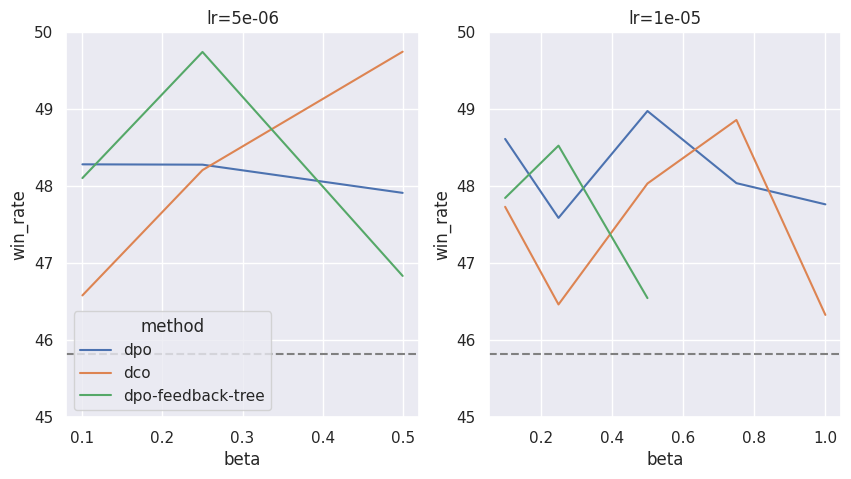

In [36]:
base_win_rate = df[df.method == 'base'].win_rate.mean()
print(base_win_rate)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

i = 0
for lr in df["lr"].unique():
    if lr == "base":
        continue

    sns.lineplot(data=df[df["lr"] == lr], x="beta", y="win_rate", hue="method", ax=ax[i], hue_order=['dpo', 'dco', 'dpo-feedback-tree'], legend=i==0)
    ax[i].axhline(base_win_rate, color="gray", linestyle="--")
    ax[i].set_title(f"lr={lr}")
    ax[i].set_ylim(45, 50)
    i += 1
plt.show()

45.822784810126585


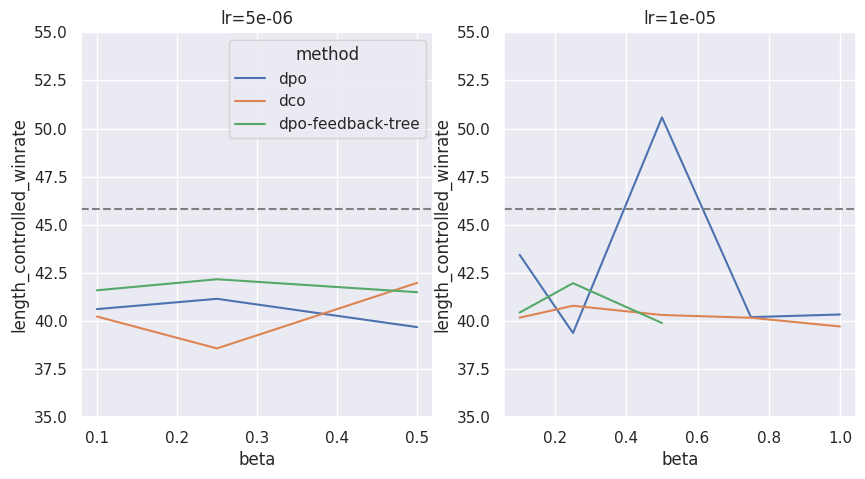

In [35]:
# df.sort_values(["length_controlled_winrate"], ascending=False)
base_win_rate = df[df.method == 'base'].win_rate.mean()
print(base_win_rate)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

i = 0
for lr in df["lr"].unique():
    if lr == "base":
        continue

    sns.lineplot(data=df[df["lr"] == lr], x="beta", y="length_controlled_winrate", hue="method", ax=ax[i], hue_order=['dpo', 'dco', 'dpo-feedback-tree'], legend=i==0)
    ax[i].axhline(base_win_rate, color="gray", linestyle="--")
    ax[i].set_title(f"lr={lr}")
    ax[i].set_ylim(35, 55)
    i += 1
plt.show()